In [1]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=16, n_features=2,
                           n_informative=2, n_redundant=0,
                           random_state=10)

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X, y)
y_hat = model.predict(X)
f_value = model.decision_function(X)
print(f_value)
print(model.predict(X))

[ 1.46512894 -1.03203074 -0.7355014   0.90163222  0.90811712 -1.10892301
  1.28523411 -2.9451636   1.29344604  2.10010735  2.4718164  -2.1000621
  0.16408684 -1.18284583 -0.64727888 -0.9956665 ]
[1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0]


In [3]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier().fit(X,y)
y_hat=model.predict(X)
# f_value=model.decision_function(X) #트리 모형에는 판별함수가 없음
# f_value

In [4]:
import numpy as np
import pandas as pd
df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=["f", "y_hat", "y"])
#f값을 내림차순으로 정렬
df.sort_values("f", ascending=False).reset_index(drop=True)

,f,y_hat,y
0,2.471816,1.0,1.0
1,2.100107,1.0,1.0
2,1.465129,1.0,1.0
3,1.293446,1.0,1.0
4,1.285234,0.0,0.0
5,0.908117,1.0,1.0
6,0.901632,1.0,1.0
7,0.164087,1.0,1.0
8,-0.647279,0.0,0.0
9,-0.735501,0.0,0.0


In [15]:
#0을 기준으로 계산한 결과
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_hat, labels=[0,1])

array([[7, 1],
       [1, 7]], dtype=int64)

In [16]:
#0을 기준으로 계산한 결과
#array([[7, 1],
# [1, 7]], dtype=int64)
fpr0 = 1 / (7 + 1) # 0을 1로 잘못 분류한 값(특이도)
tpr0 = 7 / (1 + 7) # 1을 1로 잘 찾아낸 값(민감도, recall)
print(tpr0)
print(fpr0)

0.875
0.125


In [20]:
#판별함수의 출력값에 따라 판별기준을 바꾸어 계산한 fpr,tpr
from sklearn.metrics import roc_curve
#fpr, tpr, thresholds = roc_curve(y, model.decision_function(X)) # 판별함수가 없음
#판별함수가 제공되지 않는 모형은 predict_proba() 함수를 사용할 수 있음
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:,1])
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.5  , 0.5  , 1.   ]),
 array([0.   , 0.125, 0.5  , 0.5  , 0.875, 0.875, 1.   , 1.   ]),
 array([1.92214228, 0.92214228, 0.7847299 , 0.78333942, 0.54092992,
        0.26979429, 0.26269059, 0.04996559]))

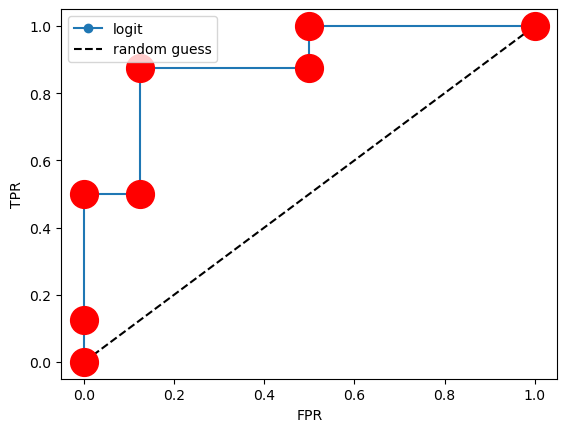

In [21]:
import matplotlib.pyplot as plt 
plt.plot(fpr, tpr, 'o-', label='logit')
plt.plot([0,1],[0,1],'k--',label='random guess')
plt.plot([fpr], [tpr], 'ro', ms=20)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [22]:
from sklearn.tree import DecisionTreeClassifier 
model=DecisionTreeClassifier().fit(X,y)
y_hat=model.predict(X)
#f_value=model.decision_function(X) #판별함수가 없음
fpr,tpr,thresholds=roc_curve(y, model.predict_proba(X)[:,1])
fpr,tpr,thresholds

(array([0., 0., 1.]), array([0., 1., 1.]), array([2., 1., 0.]))

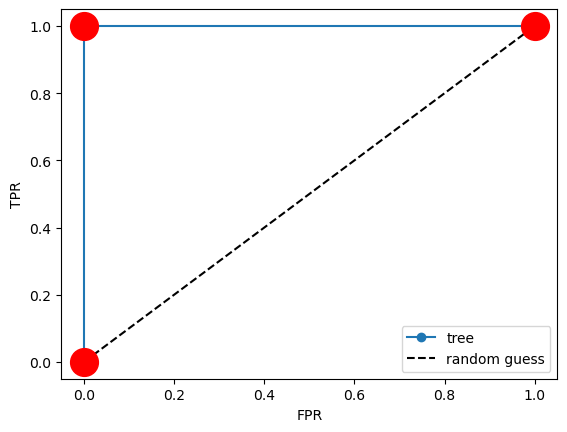

In [24]:
import matplotlib.pyplot as plt 
plt.plot(fpr, tpr, 'o-', label='tree')
plt.plot([0,1],[0,1],'k--',label='random guess')
plt.plot([fpr], [tpr], 'ro', ms=20)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()